In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [21]:
# Create a set of random latitude and longitude combinations.
# Output is zip object in memory. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [24]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [26]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa rosa
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | fianga
City not found. Skipping...
Processing Record 8 of Set 1 | anton lizardo
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | shaoyang
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | kloulklube

Processing Record 39 of Set 4 | port shepstone
Processing Record 40 of Set 4 | narsaq
Processing Record 41 of Set 4 | brainerd
Processing Record 42 of Set 4 | hit
Processing Record 43 of Set 4 | abu samrah
Processing Record 44 of Set 4 | yerbogachen
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | monrovia
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | rio de janeiro
Processing Record 49 of Set 4 | ulaangom
Processing Record 50 of Set 4 | kahului
Processing Record 1 of Set 5 | kyren
Processing Record 2 of Set 5 | kirakira
Processing Record 3 of Set 5 | champasak
Processing Record 4 of Set 5 | shimoda
Processing Record 5 of Set 5 | tamworth
Processing Record 6 of Set 5 | praxedis guerrero
Processing Record 7 of Set 5 | jalu
Processing Record 8 of Set 5 | zyryanka
Processing Record 9 of Set 5 | itoman
Processing Record 10 of Set 5 | rabo de peixe
Processing Record 11 of Set 5 | hamilton
Processin

Processing Record 25 of Set 8 | price
Processing Record 26 of Set 8 | sarakhs
Processing Record 27 of Set 8 | iguape
Processing Record 28 of Set 8 | alta floresta
Processing Record 29 of Set 8 | ilulissat
Processing Record 30 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 31 of Set 8 | poronaysk
Processing Record 32 of Set 8 | plouzane
Processing Record 33 of Set 8 | banda aceh
Processing Record 34 of Set 8 | porto novo
Processing Record 35 of Set 8 | sur
Processing Record 36 of Set 8 | volya
Processing Record 37 of Set 8 | moba
Processing Record 38 of Set 8 | tigzirt
Processing Record 39 of Set 8 | mecca
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | porto velho
Processing Record 42 of Set 8 | belmonte
Processing Record 43 of Set 8 | molln
Processing Record 44 of Set 8 | sibolga
Processing Record 45 of Set 8 | alyangula
Processing Record 46 of Set 8 | najran
Processing Record 47 of Set 8 | inhambane
Processing Record 48 of Set 8 | tay ninh
Pr

Processing Record 13 of Set 12 | praia da vitoria
Processing Record 14 of Set 12 | balkhash
Processing Record 15 of Set 12 | bowen
Processing Record 16 of Set 12 | choya
Processing Record 17 of Set 12 | ati
Processing Record 18 of Set 12 | altinho
Processing Record 19 of Set 12 | huambo
Processing Record 20 of Set 12 | krasnaya gora
Processing Record 21 of Set 12 | half moon bay
Processing Record 22 of Set 12 | timmins
Processing Record 23 of Set 12 | jinchang
Processing Record 24 of Set 12 | roald
Processing Record 25 of Set 12 | hun
Processing Record 26 of Set 12 | tagusao
Processing Record 27 of Set 12 | asyut
Processing Record 28 of Set 12 | manokwari
Processing Record 29 of Set 12 | dicabisagan
Processing Record 30 of Set 12 | luena
Processing Record 31 of Set 12 | sesheke
Processing Record 32 of Set 12 | sao paulo de olivenca
Processing Record 33 of Set 12 | sao jose da coroa grande
Processing Record 34 of Set 12 | londoko
Processing Record 35 of Set 12 | honiara
Processing Recor

In [28]:
print(len(city_data))

572


In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Rosa,14.3122,121.1114,78.78,74,51,12.01,PH,2022-02-01 16:27:39
1,Barrow,71.2906,-156.7887,-14.78,76,0,0.00,US,2022-02-01 16:27:40
2,Pacific Grove,36.6177,-121.9166,49.44,93,0,1.01,US,2022-02-01 16:27:40
3,Port Alfred,-33.5906,26.8910,78.80,78,100,11.59,ZA,2022-02-01 16:27:40
4,Vaini,-21.2000,-175.2000,75.36,94,20,3.44,TO,2022-02-01 16:27:41
5,Anton Lizardo,19.0500,-95.9833,76.21,77,93,4.90,MX,2022-02-01 16:27:41
6,Mount Gambier,-37.8333,140.7667,48.11,71,75,6.91,AU,2022-02-01 16:27:41
7,Busselton,-33.6500,115.3333,62.04,59,0,20.58,AU,2022-02-01 16:24:19
8,Shaoyang,27.2315,111.4525,37.00,97,100,3.31,CN,2022-02-01 16:27:42
9,Cape Town,-33.9258,18.4232,82.11,45,23,1.01,ZA,2022-02-01 16:26:28


In [30]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santa Rosa,PH,2022-02-01 16:27:39,14.3122,121.1114,78.78,74,51,12.01
1,Barrow,US,2022-02-01 16:27:40,71.2906,-156.7887,-14.78,76,0,0.00
2,Pacific Grove,US,2022-02-01 16:27:40,36.6177,-121.9166,49.44,93,0,1.01
3,Port Alfred,ZA,2022-02-01 16:27:40,-33.5906,26.8910,78.80,78,100,11.59
4,Vaini,TO,2022-02-01 16:27:41,-21.2000,-175.2000,75.36,94,20,3.44
5,Anton Lizardo,MX,2022-02-01 16:27:41,19.0500,-95.9833,76.21,77,93,4.90
6,Mount Gambier,AU,2022-02-01 16:27:41,-37.8333,140.7667,48.11,71,75,6.91
7,Busselton,AU,2022-02-01 16:24:19,-33.6500,115.3333,62.04,59,0,20.58
8,Shaoyang,CN,2022-02-01 16:27:42,27.2315,111.4525,37.00,97,100,3.31
9,Cape Town,ZA,2022-02-01 16:26:28,-33.9258,18.4232,82.11,45,23,1.01


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

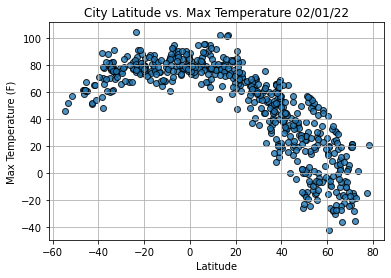

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

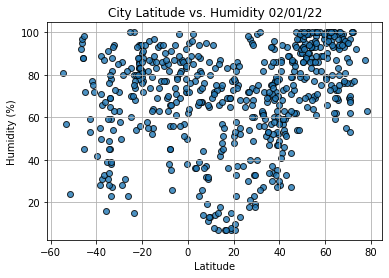

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

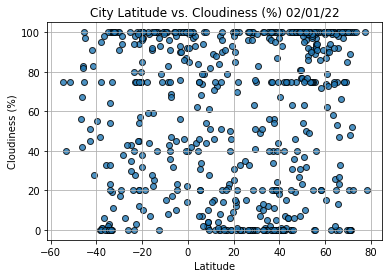

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

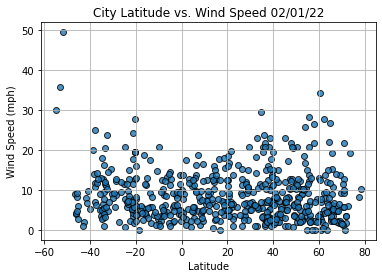

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Showing all info from index 13 of city_data_df. 
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2022-02-01 16:27:00
Lat                       22.0752
Lng                      -159.319
Max Temp                    65.12
Humidity                       75
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santa Rosa,PH,2022-02-01 16:27:39,14.3122,121.1114,78.78,74,51,12.01
1,Barrow,US,2022-02-01 16:27:40,71.2906,-156.7887,-14.78,76,0,0.00
2,Pacific Grove,US,2022-02-01 16:27:40,36.6177,-121.9166,49.44,93,0,1.01
5,Anton Lizardo,MX,2022-02-01 16:27:41,19.0500,-95.9833,76.21,77,93,4.90
8,Shaoyang,CN,2022-02-01 16:27:42,27.2315,111.4525,37.00,97,100,3.31
...,...,...,...,...,...,...,...,...,...
564,Takoradi,GH,2022-02-01 16:42:37,4.8845,-1.7554,83.01,67,7,12.55
566,Ust-Omchug,RU,2022-02-01 16:42:38,61.1500,149.6333,-6.00,96,100,7.72
567,Gao,ML,2022-02-01 16:42:38,16.6362,1.6370,78.21,7,20,12.41
568,Emba,KZ,2022-02-01 16:42:38,48.8264,58.1442,21.69,81,100,10.51


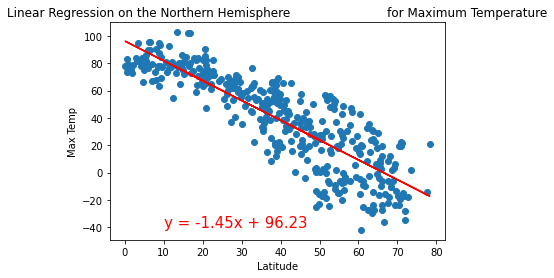

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

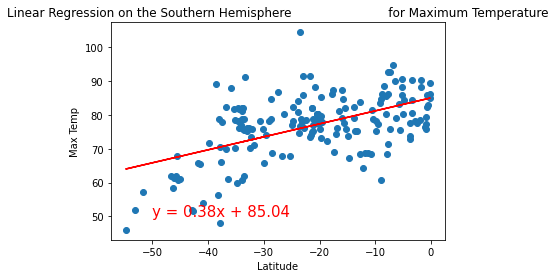

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,50))

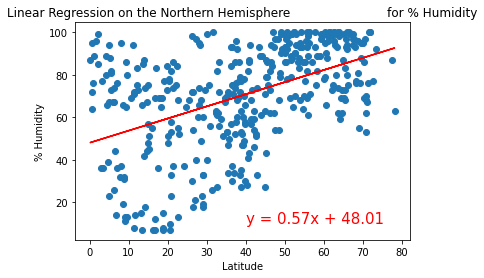

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

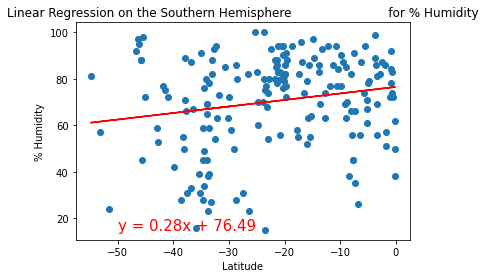

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

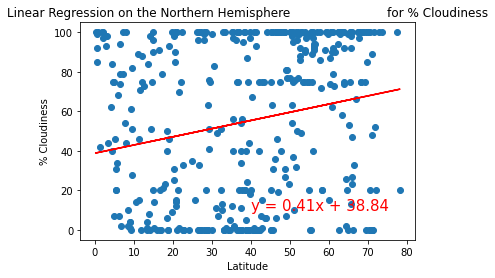

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

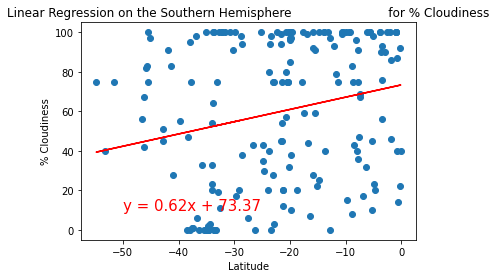

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,10))

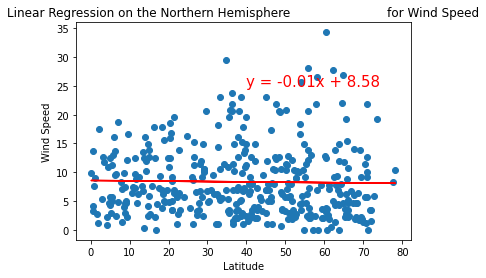

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

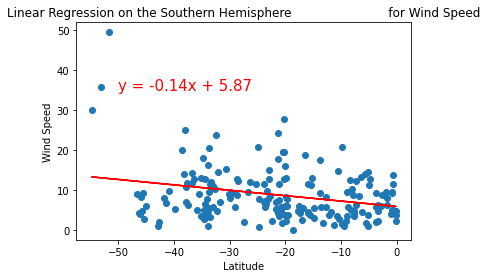

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))